In [1]:
#Importing dependencies
import numpy as np
import pandas as pd
import os
from csv import reader
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
import math

In [2]:
os.getcwd()

'/Users/pw/Linear_Regression_Batch'

In [3]:
#The csv file upload function
def csv_upload(filename):
    dataset = []
    with open(filename, 'r') as file:
        csv_reader = reader(file, delimiter = ',')
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
        del dataset[0]
    return dataset

In [4]:
#Uploading the csv_file
filename = '/Users/pw/Desktop/Machine Learning/mlwork/iris.csv'
dataset = csv_upload(filename)
dataset[0]

['5.1', '3.5', '1.4', '0.2', 'setosa']

In [5]:
#Deleting the fourth column
for row in dataset:
    del row[4]
dataset[0]

['5.1', '3.5', '1.4', '0.2']

In [6]:
#Converting all the string data to a float format
def stringToFloat(mylist):
    for column in range(len(mylist[0])):
        for row in mylist:
            row[column] = float(row[column].strip())
    return mylist

In [7]:
convData = stringToFloat(dataset)
convData[0]

[5.1, 3.5, 1.4, 0.2]

In [8]:
names = ['sepal_length','sepal_width','petal_length','petal_width']

In [9]:
#convert a list to a dataframe
def listToDf(mylist):
    df = pd.DataFrame(mylist, columns = names)
    
    return df   

In [10]:
dataframe = listToDf(convData)

In [11]:
dataframe.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [13]:
# Dropping columns that have missing values more than 1/3 of total values
#Logic: df.count() does not NaN values
"""def missingDelete(dataframe):
    newdata = dataframe[[column for column in dataframe if dataframe[column.count()/ len(dataframe) >= 0.3]]]
    
    for column in dataframe:
        if column not in newdata:
            print(column)
    dataframe = newdata"""

'def missingDelete(dataframe):\n    newdata = dataframe[[column for column in dataframe if dataframe[column.count()/ len(dataframe) >= 0.3]]]\n    \n    for column in dataframe:\n        if column not in newdata:\n            print(column)\n    dataframe = newdata'

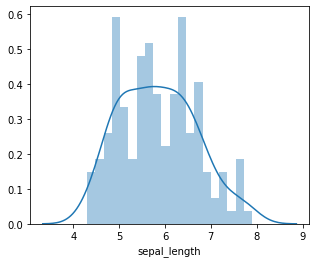

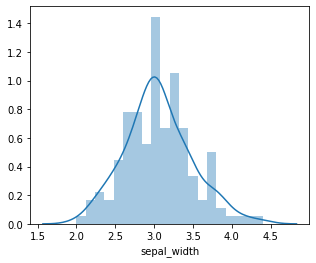

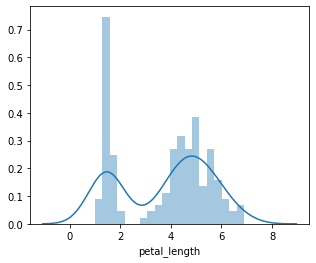

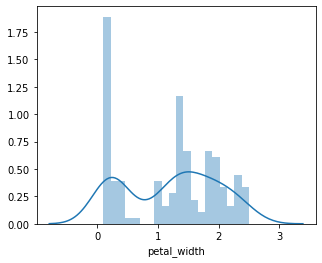

In [14]:
#creating density plots

plt.figure(figsize = (5,4))
sns.distplot(dataframe['sepal_length'], bins = 20)
plt.figure(figsize = (5,4))
sns.distplot(dataframe['sepal_width'], bins = 20)
plt.figure(figsize = (5,4))
sns.distplot(dataframe['petal_length'], bins = 20)
plt.figure(figsize = (5,4))
sns.distplot(dataframe['petal_width'], bins = 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19daf610>,
      dtype=object)

<Figure size 648x576 with 0 Axes>

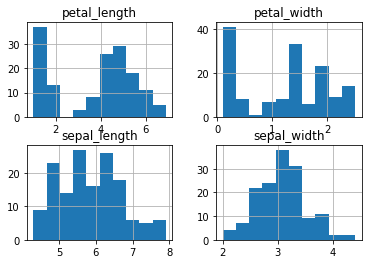

In [15]:
#Creating histogram for numeric data
plt.figure(figsize=(9,8))
dataframe.hist()

In [16]:
#Finding the correlation of the variable to the dependent variables
dataframe.corr()['sepal_width']

sepal_length   -0.109369
sepal_width     1.000000
petal_length   -0.420516
petal_width    -0.356544
Name: sepal_width, dtype: float64

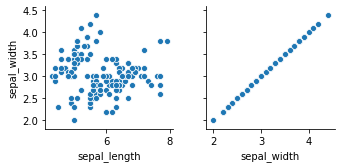

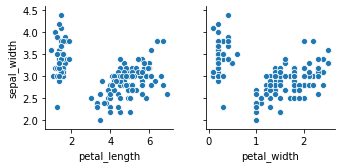

In [17]:
#Visualizing the relationship through pairwise plots
for i in range(0, len(dataframe.columns),2):
    sns.pairplot(data = dataframe, x_vars = dataframe.columns[i:i+2],
                y_vars = ['sepal_width'])

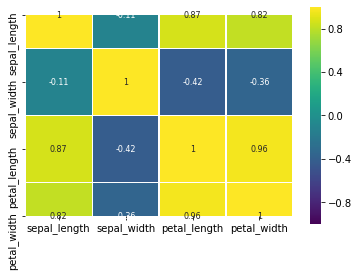

In [18]:
#Heat map for all the correlations / Feature to feature relationships
corr = dataframe.corr()

sns.heatmap(corr, cmap = 'viridis', vmax = 1.0, vmin = -1.0, linewidths = 0.1,
           annot = True, annot_kws = {"size": 8}, square = True);


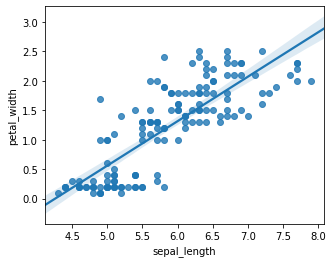

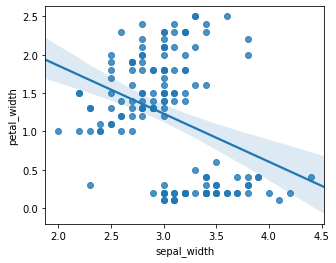

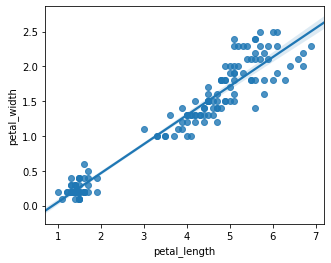

In [19]:
# Quantitative to quantitative relationships
plt.figure(figsize =(5,4))
sns.regplot(x = "sepal_length", y = "petal_width", data = dataframe)
plt.figure(figsize =(5,4))
sns.regplot(x = "sepal_width", y = "petal_width", data = dataframe)
plt.figure(figsize =(5,4))
sns.regplot(x = "petal_length", y = "petal_width", data = dataframe)

In [20]:
#MODEL BUILDING
#Shuffling the data
random.seed(4)
random.shuffle(dataset)
dataset[0]

[4.3, 3.0, 1.1, 0.1]

In [21]:
#Normalization
#Column Mean calculation
def columnMean(dataset):
    meanlist = []
    for i in range(len(dataset[0])):
        count = 0
        colsum = 0
        for row in dataset:
            colsum += row[i]
            count += 1
        colmean = float("{0:.2f}".format(colsum / count))
        meanlist.append(colmean)
    return meanlist      

In [22]:
meanList = columnMean(dataset)

In [23]:
meanList

[5.84, 3.05, 3.76, 1.2]

In [24]:
#Column Standard Deviation function
def columnSd(dataset, meanList):
    sdList = []
    meanList = columnMean(dataset)
    for i in range(len(dataset[0])):
        count = 0
        error_sum = 0
        for row in dataset:
            error_sum += (row[i] - meanList[i])**2
            count += 1
        colSd = float("{0:.2f}".format(math.sqrt(error_sum / count)))
        sdList.append(colSd)
    return sdList

In [25]:
sdList = columnSd(dataset,meanList)

In [26]:
sdList

[0.83, 0.43, 1.76, 0.76]

In [27]:
#Standard Normalization
def standardScaler(dataset, meanList, sdList):
    for i in range(len(dataset[0])):
        for row in dataset:
            row[i] = (row[i] - meanList[i])/ sdList[i]
    return dataset

In [28]:
normData = standardScaler(dataset, meanList, sdList)

In [29]:
normData[0]

[-1.8554216867469882,
 -0.11627906976744144,
 -1.5113636363636362,
 -1.4473684210526314]

In [30]:
#Creating the train data and test data
newData = normData

In [31]:
newData[0]

[-1.8554216867469882,
 -0.11627906976744144,
 -1.5113636363636362,
 -1.4473684210526314]

In [32]:
#converting the dataset into numpy arrays
data = np.asarray(newData)

In [33]:
X_train = data[0:120,[0,1,2]]
Y_train = data[0:120,3]

In [34]:
X_test = data[121:,[0,1,2]]
Y_test = data[121:,3]

In [83]:
#The hypothesis or predict function
def predict(X, theta,n):
    predict = np.ones((X.shape[0],1))
    for i in range(0, X.shape[0]):
        predict[i] = float(np.matmul(theta, X[i].transpose()))
    return predict    

In [86]:
#The gradient Descent optimization function
def gradient_descent(alpha, max_error, max_iter,X,Y,predict):
    n = X.shape[1]
    one_column = np.ones((X.shape[0], 1))
    X = np.concatenate((one_column, X), axis = 1)
    theta = np.zeros(n+1)
    theta = theta.reshape((1,n+1))
    predict = predict(theta,X,n)
    m = X.shape[0]
    iter = 0
    converged = False
    
    #Initial Error
    
    Jtheta = sum([(predict[i] - Y[i])**2 for i in range(m)])
    
    while not converged:
        theta[0] = theta[0] - (alpha/X.shape[0] * sum([(predict[k]-Y[k])**2 for k in range(m)]))
        for j in range(1, n+1):
            theta[j] = theta[j] - (alpha/X.shape[0] * sum([(predict[k]-Y[k])**2*X.transpose()[k][j] for k in range(m)]))
        
        predict = predict(theta,X)
        
        e = sum([(predict[i] - Y[i])**2 for i in range(m)])
        
        if abs(Jtheta - e) <= max_error:
            print("Converged, number of iterations: ", iter)
            converged = True
        Jtheta = e
        iter += 1
        
        
        if iter == max_iter:
            print("Maximum number of iterations reached:")
            converged = True
        
    theta = theta.reshape(1, n+1)
    return theta, Jtheta  

In [87]:
gradient_descent(0.05, 0.001, 10000, X_train,Y_train,predict)

TypeError: only size-1 arrays can be converted to Python scalars

In [54]:
one_col = np.ones((X_train.shape[0],1)) 
X_try = np.concatenate((one_col, X_train), axis = 1)

In [55]:
X_try.shape

(120, 4)

In [57]:
X_try[1]

array([1.        , 0.55421687, 0.81395349, 1.04545455])

In [58]:
theta_try = np.zeros(4)

In [82]:
X_try[1].transpose()

array([1.        , 0.55421687, 0.81395349, 1.04545455])

In [77]:
new = np.ones((X_try.shape[0],1))
for i in range(0,X_try.shape[0]):
    new[i] = float(np.matmul(theta_try, X_try[i]))
new

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [69]:
new[5]

array([0.])